<a href="https://colab.research.google.com/github/kapilkukreja469/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING_by_kapil_kukreja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - NETFLIX MOVIES AND TV SHOWS CLUSTERING**



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Submited by**     - Kapil Kukreja

# **Project Summary -**

## 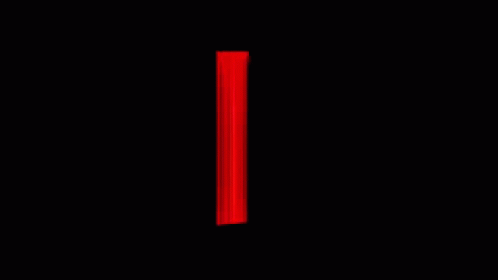

Netflix is a subscription-based streaming service that provides its members with access to a vast library of movies and TV shows. With such a large content catalog, it can be challenging for users to find content that matches their preferences. To address this issue, Netflix uses data analysis and machine learning techniques such as clustering to group their content into similar categories. This approach involves analyzing various characteristics of each title, such as type, cast, director, country, and using algorithms to identify patterns and similarities.

The Aim of this project is to form the clusters based on K mean clustering and Agglomerative clustering and build a simple recommender system. In this project, I worked on a text clustering problem where we had to classify/group the Netflix movies and shows into certain clusters such that the shows and movies within a cluster are similar to each other and the shows and movies in different clusters are dissimilar to each other. The dataset contained about 7787 records, and 12 attributes. I began by dealing with the dataset's missing values and doing exploratory data analysis (EDA). It was found that Netflix hosts more movies than TV shows on its platform, and the total number of shows and movies added on Netflix is growing exponentially. Also, majority of the shows were produced in the United States, and most of the shows on Netflix were created for adults and teens. Once obtained the required insights from the EDA, we start with Pre-processing the text data by removing the punctuation and stop words. This filtered data is passed through TF - IDF Vectorizer since we are conducting a text-based clustering and the model needs the data to be vectorized in order to predict the desired results. It was decided to cluster the data based on the attributes: director, cast, country and description. The values in these attributes were tokenized, pre-processed, and then vectorized using TFIDF vectorizer. Through TFIDF Vectorization, we created a total of 20000 attributes. Principal Component Analysis (PCA) has been used to handle the curse of dimensionality. 5000 components were able to capture more than 95% of variance, and hence, the number of components were restricted to 5000. We first built clusters using the k-means clustering algorithm, and the optimal number of clusters came out to be 9. This was obtained through the elbow method and Silhouette score analysis. Then clusters were built using the Agglomerative clustering algorithm, and the optimal number of clusters came out to be 11. This was obtained after visualizing the dendrogram. A simple content-based recommender system was built using the similarity matrix obtained after using cosine similarity. This recommender system will make ten recommendations to the user, based on the type of show or movie they watched.


# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


The dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.\
In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.
Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

### **In this project, We are required to do**

* Exploratory Data Analysis
* Understanding what type content is available in different countries
*	If Netflix has been increasingly focusing on TV rather than movies in recent years.
*	Clustering similar content by matching text-based features.



# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [5]:
# Import Libraries
import numpy as np                             # importing numpy library for working with arrays
import pandas as pd                            # importing pandas library for working with data sets
import matplotlib.pyplot as plt                # importing matplotlib library for creating static, animated, and interactive visualizations
import seaborn as sns                          # importing seaborn library for creating statistical graph in Python
import plotly.graph_objects as go
import plotly.express as px

from wordcloud import WordCloud, STOPWORDS
from scipy.stats import ttest_ind
from scipy import stats

# libraries used to process textual data
import string
string.punctuation
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

# libraries used to implement clusters
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
"""
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_samples
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage

from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import StandardScaler"""


import warnings                                             # importing warnings to sets a filter to ignore all warnings
warnings.filterwarnings("ignore")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


### Dataset Loading

In [6]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/almabetter/Netflix Movies and TV Shows Clustering/NETFLIX MOVIES AND TV SHOWS CLUSTERING .csv')

### Dataset First View

In [8]:
# Dataset First Look
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,R,119 min,Dramas,After one of his high school students attacks ...
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",2019,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w..."
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...


In [9]:
# Dataset First Look
df.tail(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7777,s7778,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
7778,s7779,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
7779,s7780,TV Show,Zona Rosa,NaN,"Manu NNa, Ana Julia Yeyé, Ray Contreras, Pablo...",Mexico,"November 26, 2019",2019,TV-MA,1 Season,"International TV Shows, Spanish-Language TV Sh...",An assortment of talent takes the stage for a ...
7780,s7781,Movie,Zoo,Shlok Sharma,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,"July 1, 2018",2018,TV-MA,94 min,"Dramas, Independent Movies, International Movies",A drug dealer starts having doubts about his t...
7781,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


### Dataset Rows & Columns count

In [10]:
# Dataset Rows & Columns count
print("Total no of rows present in dataframe are=",df.shape[0])
print("Total no of columns present in dataframe are=",df.shape[1])

Total no of rows present in dataframe are= 7787
Total no of columns present in dataframe are= 12


### Dataset Information

In [11]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [12]:
# Dataset Duplicate Value Count
#duplicated() method used to find duplicate rows in table based on store and date column
print(f"No. of duplicate rows in Netflix dataset: {len(df[df.duplicated()])}")

No. of duplicate rows in Netflix dataset: 0


#### Missing Values/Null Values

In [13]:
# Missing Values/Null Values Count
print(df.isnull().sum())

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


<Axes: >

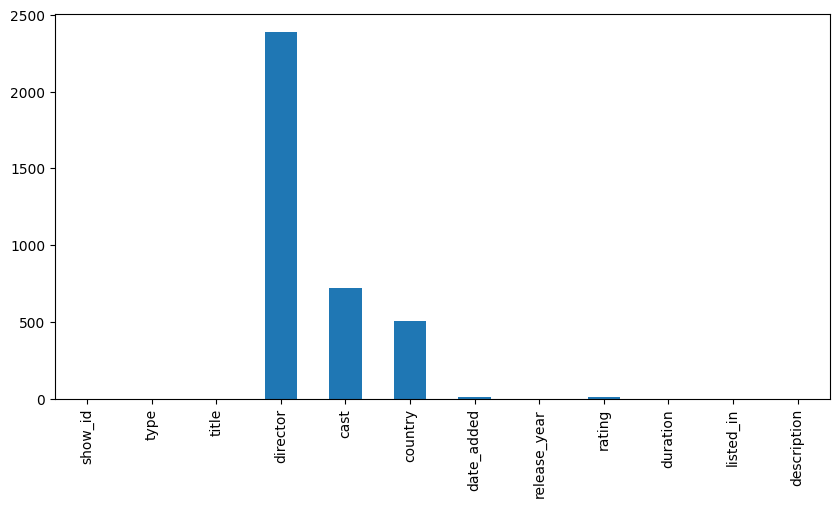

In [14]:
# Visualizing the missing values
plt.rcParams['figure.figsize'] = (10,5)
df.isnull().sum().plot(kind='bar')

### What did you know about your dataset?

*   **Our data has 7787 rows and 12 columns.**
*   **11 columns have object data type and 1 column have int data type.**
*   **5 columns (director, cast, country, date_added, rating) have null values.**
*   **Data doesn't contain duplicate rows.**





## ***2. Understanding Your Variables***

In [15]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [16]:
# Dataset Describe
df.describe(include ='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,7787,7787,s1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,7787,2,Movie,5377,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,7787,7787,3%,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,5398,4049,"Raúl Campos, Jan Suter",18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,7069,6831,David Attenborough,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7280,681,United States,2555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,7777,1565,"January 1, 2020",118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,7787.0,NaN,NaN,NaN,2013.93258,8.757395,1925.0,2013.0,2017.0,2018.0,2021.0
rating,7780,14,TV-MA,2863,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,7787,216,1 Season,1608,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Variables Description

**Attribute Information**

**show_id :** Unique ID for every Movie / Tv Show

**type :** Identifier - A Movie or TV Show

**title :** Title of the Movie / Tv Show

**director :** Director of the Movie / Tv Show

**cast :** Actors involved in the movie / Tvshow

**country :** Country where the movie / Tvshow was produced

**date_added :** Date it was added on Netflix

**release_year :** Actual Releaseyear of the movie / Tvshow

**rating :** TV Rating of the movie / Tvshow

**duration :** Total Duration - in minutes or number of seasons

**listed_in :** Genere

**description:** The Summary description



### Check Unique Values for each variable.

In [17]:
# Check Unique Values for each variable.
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [18]:
# Write your code to make your dataset analysis ready.
# Null values percentage
print('Missing Data Percentage')
print(round(df.isna().sum()[df.isna().sum() > 0].sort_values(ascending=False)*100/len(df),2))

Missing Data Percentage
director      30.68
cast           9.22
country        6.51
date_added     0.13
rating         0.09
dtype: float64


In [19]:
# The missing values in the 'director', 'cast', and 'country' columns can be replaced with the label 'Unknown'.
df[['director']]=df[['director']].fillna('Unknown')
df[['cast']]=df[['cast']].fillna('Unknown')
df[['country']]=df[['country']].fillna('Unknown')

In [20]:
# We cannot replace missing values in the 'date_added' column.
# And since they constitute a small portion of the data.
# Therefore, we will exclude these values from our analysis.
df.dropna(subset=['date_added'], inplace=True)

In [21]:
df.shape   #shape after droping 10 rows

(7777, 12)

In [22]:
# For the missing values in the 'rating' column, we can impute them with the mode since this attribute is discrete.
df['rating'].fillna(value=df['rating'].mode()[0],inplace=True)

In [23]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [24]:
# Changing the values in the rating column
# Create a dictionary to map the current ratings to new ratings
rating_map = {'TV-MA':'Adults',
'R':'Adults',
'PG-13':'Teens',
'TV-14':'Young Adults',
'TV-PG':'Older Kids',
'NR':'Adults',
'TV-G':'Kids',
'TV-Y':'Kids',
'TV-Y7':'Older Kids',
'PG':'Older Kids',
'G':'Kids',
'NC-17':'Adults',
'TV-Y7-FV':'Older Kids',
'UR':'Adults'}

# Replace the current ratings with the new ratings using the mapping dictionary
df['rating'].replace(rating_map,inplace=True)

# Print the unique values in the 'rating' column to verify that the changes have been made
print(df['rating'].unique())

['Adults' 'Teens' 'Young Adults' 'Older Kids' 'Kids']


In [25]:
# Create new features to store date, day, month and year seperately.
df["date_added"] = pd.to_datetime(df['date_added'])  # First convert date_added to date time format.
df['day_added'] = df['date_added'].dt.day            # Compute day.
df['year_added'] = df['date_added'].dt.year          # Compute year.
df['month_added'] = df['date_added'].dt.month        # Compute month.

In [26]:
# We will transform the 'duration' column in the dataframe by splitting the string value
# on whitespace delimiter and then converting it into an integer datatype.
df['duration'] = df['duration'].apply(lambda x: int(x.split()[0]))

### What all manipulations have you done and insights you found?

1) Replaced missing values in the 'director', 'cast', and 'country' columns with the label 'Unknown'.

2) Imputing missing values in the 'rating' column with the mode.

3) We cannot replace missing values in the 'date_added' column since they constitute a small portion of the data Therefore we drop those values from our analysis.

4) Changed the values in the rating column by Creating a dictionary to map the current ratings to new ratings.

5) In the "Date Added" column, additional information has been extracted to new columns such as the day, month, and year.

6) Transformed the 'duration' column in the dataframe by splitting the string value on whitespace delimiter and converting it into an integer datatype.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### **Chart - 1 Type of content available on Netflix**

In [27]:
# Chart - 1 visualization code
colors = ['	#db0000', '	#564d4d']
labels = ['Tv Show', 'Movie']
tv_show = df.type.value_counts()[1]
movie = df.type.value_counts()[0]

fig = go.Figure(data=[go.Pie(labels=labels, values=[tv_show, movie], hole=.6)])
fig.update_layout(
    title_text="Type of content available on Netflix",title_x=0.5, legend=dict(x=0.9),height=500, width=500,
    annotations=[dict(text='Type of content.', font_size=20, showarrow=False)])    # Add annotations in the center of the donut pies.
fig.update_traces(marker=dict(colors=colors))
fig.show()

##### **1. Why did you pick the specific chart?**

Donut charts are a type of data visualization tool used to display data in a circular format. Donut charts are useful for showing how individual data points or categories contribute to a whole.

##### **2. What is/are the insight(s) found from the chart?**

It is clear that the netflix has more movies than the TV shows in a percentage of 69.1% against 30.9%. Netflix has 5377 movies, which is more than double the quantity of TV shows.

##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

The insights gained from the chart may help create a positive business impact for Netflix. Knowing that the majority of the content in the Netflix dataset is Movies, and that Netflix has a preference towards Movies, may inform decisions related to content production and acquisition. For instance, Netflix may choose to allocate more resources towards producing and acquiring Movies in order to attract more viewers and subscribers.

#### **Chart - 2 Top 10 actors of movies and Tv shows**

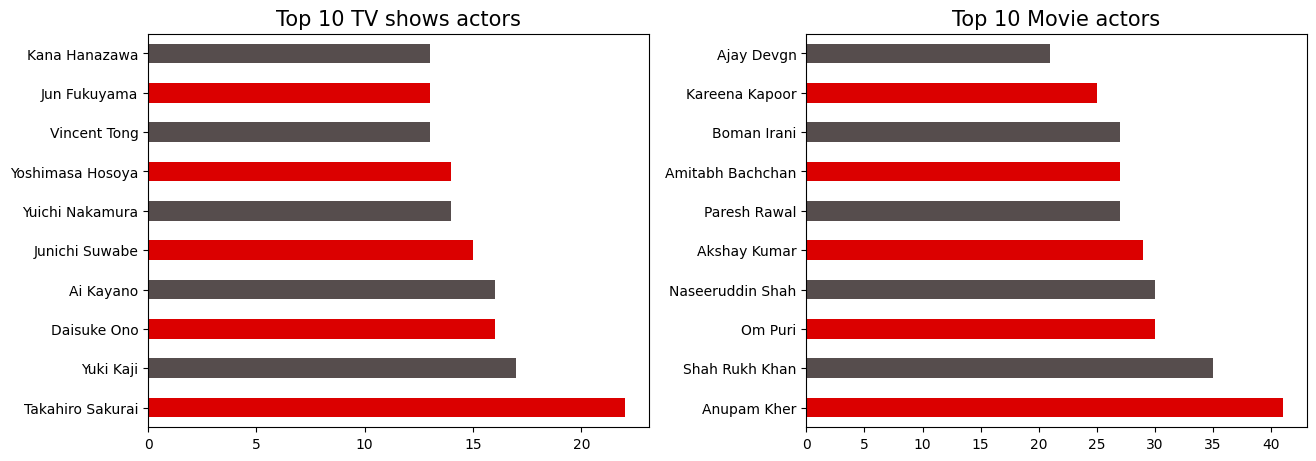

In [28]:
# Chart - 2 visualization code
fig,ax = plt.subplots(1,2, figsize=(14,5))
# seperating TV shows actor from cast column
top_TVshows_actor = df[df['type']=='TV Show']['cast'].str.split(', ', expand=True).stack()
top_TVshows_actor = top_TVshows_actor[(top_TVshows_actor != 'No cast') & (top_TVshows_actor != 'Unknown')]
# plotting actor who appeared in highest number of TV Show
colors = sns.color_palette(["#db0000", "#564d4d"], n_colors=2)
a = top_TVshows_actor.value_counts().head(10).plot(kind='barh', ax=ax[0],color=colors)
a.set_title('Top 10 TV shows actors', size=15)

# seperating movie actor from cast column
top_movie_actor = df[df['type']=='Movie']['cast'].str.split(', ', expand=True).stack()
top_movie_actor = top_movie_actor[(top_movie_actor != 'No cast') & (top_movie_actor != 'Unknown')]
# plotting actor who appeared in highest number of Movie
b = top_movie_actor.value_counts().head(10).plot(kind='barh', ax=ax[1],color=colors)
b.set_title('Top 10 Movie actors', size=15)

plt.tight_layout(pad=1.2, rect=[0, 0, 0.95, 0.95])
plt.show()


##### **1. Why did you pick the specific chart?**

The horizontal orientation of the bars allows for easier reading and comparison of the values. The length of each bar represents the number of TV shows or movies an actor has appeared in. The chart also divided into two subplots, making it clear that one subplot represents TV shows and the other represents movies.


##### **2. What is/are the insight(s) found from the chart?**

In the TV shows category, the actor with the highest appearance is Takahiro Sakurai with 22 shows. In the movies category, the top actor by the number of movies they appeared in is Anupam Kher, who appeared in 41 movies in the dataset.

##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

The insights can help in identifying the target audience for different titles, as different actors may appeal to different demographics. The data can also help Netflix to identify trends and preferences among its user base, which could help inform decisions related to content acquisition and production.

#### **Chart - 3 Top 10 directors of movies and Tv shows**

In [29]:
movie = df[df['type']=='Movie']['director'].value_counts()[:10]   # Top 10 director who directed movie
show = df[df['type']=='TV Show']['director'].value_counts()[:10]  # Top 10 director who directed TV show
print("Top 10 movies directors \n",movie)
print("Top 10 shows directors \n",show)

Top 10 movies directors 
 Unknown                   163
Raúl Campos, Jan Suter     18
Marcus Raboy               15
Jay Karas                  14
Cathy Garcia-Molina        13
Jay Chapman                12
Martin Scorsese            12
Youssef Chahine            12
Steven Spielberg           10
David Dhawan                9
Name: director, dtype: int64
Top 10 shows directors 
 Unknown                       2216
Alastair Fothergill              3
Shin Won-ho                      2
Iginio Straffi                   2
Rob Seidenglanz                  2
Stan Lathan                      2
Ken Burns                        2
Cosima Spender                   1
Jani Lachauer, Jakob Schuh       1
Jalil Lespert                    1
Name: director, dtype: int64


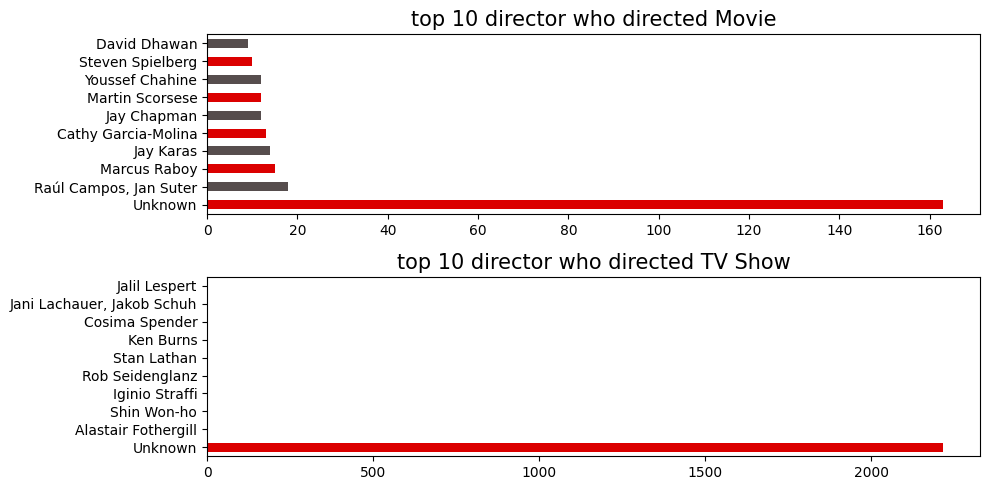

In [30]:
# Chart - 3 visualization code
fig,ax = plt.subplots(2,1, figsize=(10,5))
colors = sns.color_palette(["#db0000", "#564d4d"], n_colors=2)

# Top 10 director who directed movie
movie = df[df['type']=='Movie']['director'].value_counts()[:10].plot(kind='barh', color=colors, ax=ax[0])
movie.set_title('top 10 director who directed Movie', size=15)

# Top 10 director who directed TV show
show = df[df['type']=='TV Show']['director'].value_counts()[:10].plot(kind='barh', color=colors, ax=ax[1])
show.set_title('top 10 director who directed TV Show', size=15)

plt.tight_layout()
plt.show()

##### **1. Why did you pick the specific chart?**

Bar plots are simple and effective way to visualize the relationship between categorical features. For Visulization of Top 10 director of movie and tv shows we use barplots chart that allow a quick visual comparison between different directos.

##### **2. What is/are the insight(s) found from the chart?**


1. Alstair Fothergill directed highest shows in datalist which is 3.
2. Raul Campos and Jan Suter together have directed 18 movies, higher than anyone in the dataset.
3. There are some movies and tv shows whose directors are unknown. 163 movies and 2216 tv shows directors are unknown.

##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

These insights may help inform decisions related to content production and acquisition, as they provide information about the most popular directors on Netflix and their past work.

#### **Chart - 4 Content added over the years**

In [31]:
# Chart - 4 visualization code
tv_show = df[df["type"] == "TV Show"]
movie = df[df["type"] == "Movie"]

content_1 = tv_show["year_added"].value_counts().sort_index()
content_2 = movie["year_added"].value_counts().sort_index()

trace1 = go.Scatter(x=content_1.index, y=content_1.values, name="TV Shows", marker=dict(color="#564d4d", line=dict(width=4)))
trace2 = go.Scatter(x=content_2.index, y=content_2.values, name="Movies", marker=dict(color="#db0000", line=dict(width=4)))

fig = go.Figure(data=[trace1, trace2], layout=go.Layout(title="Content added over the years",title_x=0.5, legend=dict(x=0.8, y=1.1, orientation="h")))
# Display chart
fig.show()

##### **1. Why did you pick the specific chart?**

The line chart is suitable for showing the trend and distribution of data over a continuous axis (in this case, the years). It allows for easy comparison between the two categories (TV shows and movies) and how their counts vary over time.

##### **2. What is/are the insight(s) found from the chart?**

The trend in the visualization indicates that between 2008 and 2015, there were relatively fewer TV shows and movies added to Netflix. However, starting from 2016, there was a slight increase in content additions. In 2019, there was a significant peak in the number of movies added, while TV shows experienced a similar trend but with a lesser increase compared to movies.

##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

The gained insights indicate a positive impact for Netflix as the demand for both TV shows and movies on the platform has been increasing rapidly over the years. This growth presents an opportunity for Netflix to provide more high-quality content to its users, thereby enhancing user satisfaction and engagement.

#### **Chart - 5 Top Genres present in Netflix**

In [32]:
# seperating genre from listed_in columns for analysis purpose
genres = df['listed_in'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

# genre count in listed movie/show
genres = genres.value_counts().reset_index().rename(columns={'index':'genre', 0:'count'})
genres.head(10)

,genre,count
0,International Movies,2437
1,Dramas,2106
2,Comedies,1471
3,International TV Shows,1198
4,Documentaries,786
5,Action & Adventure,721
6,TV Dramas,703
7,Independent Movies,673
8,Children & Family Movies,532
9,Romantic Movies,531


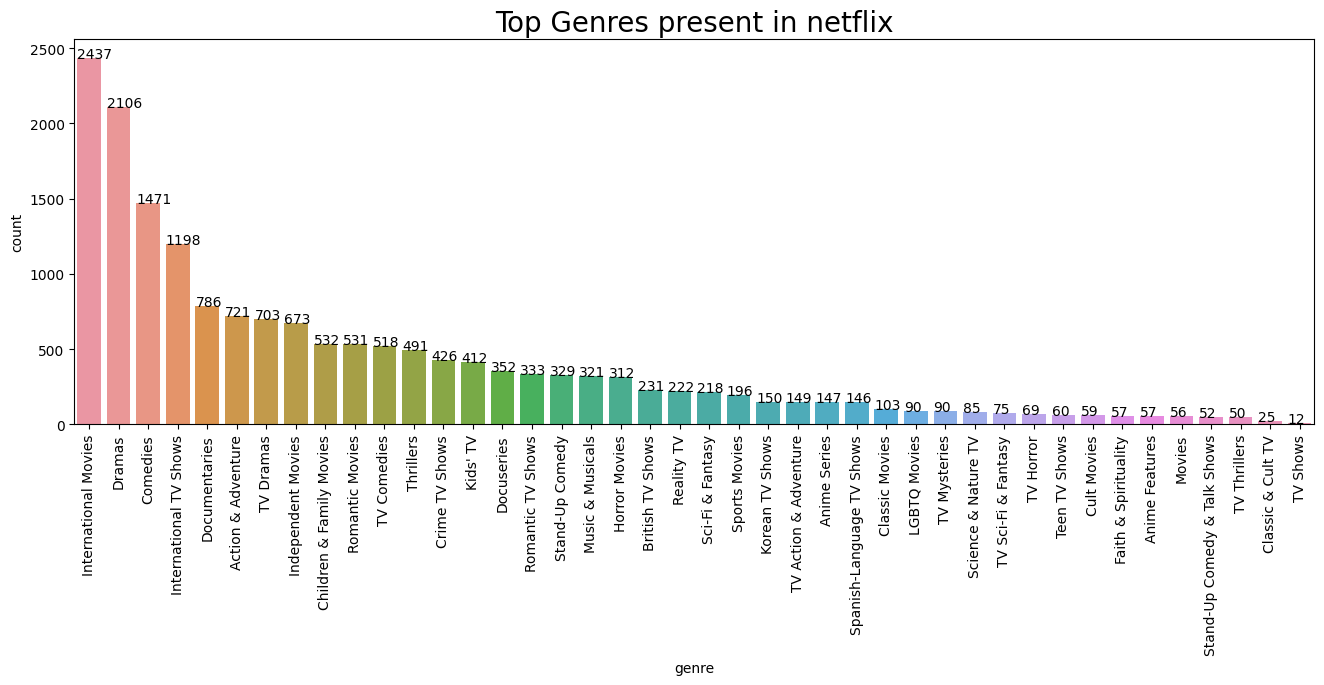

In [33]:
# Chart - 5 visualization code
plt.figure(figsize=(16,5))
graph = sns.barplot(x='genre', y='count', data=genres)
graph.set_title('Top Genres present in netflix', size=20)
plt.xticks(rotation=90)

#adding value count on the top of bar
for p in graph.patches:
   graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

plt.show()

##### **1. Why did you pick the specific chart?**

Barplot chart are excellent for comparing data between different categories or groups. The length or height of the bars makes it easy to see which category has the highest or lowest values. This barplot chart shows comparison of different movie/show genres with their corresponding counts.

##### **2. What is/are the insight(s) found from the chart?**

1) Highest number of genre belong from International movies, Dramas, Comedies respectively.\
2) Least number of genre belong from Tv shows, Classic & cult TV, TV Thriller, Stand-Up comedy and Talk show

##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

The gained insights from the chart can help create a positive business impact by allowing Netflix to better understand the content preferences of their audience. They can use this information to make more informed decisions about what type of content to acquire and produce, which can help increase their viewership and revenue.

#### **Chart - 6 Top 10 countries with the highest number of movies and TV shows**

Text(0, 0.5, 'Country')

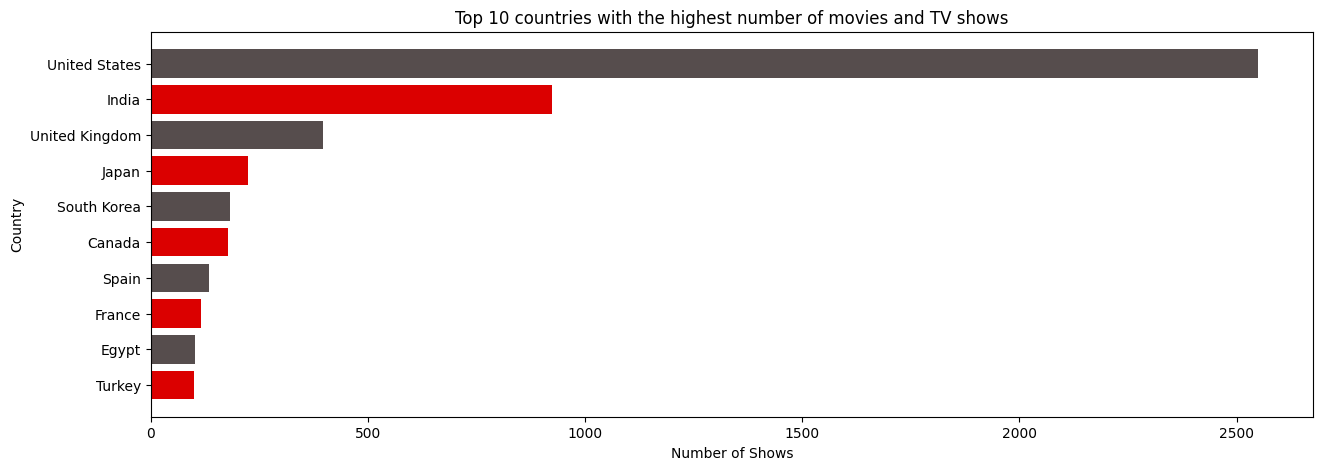

In [34]:
# Chart - 6 visualization code
# Get the top 10 countries with the highest number of movies and TV shows in the dataset
top_countries = df.loc[df['country'] != 'Unknown', 'country'].value_counts().nlargest(10).sort_values(ascending=True)
plt.figure(figsize=(15,5))
colors = sns.color_palette(["#db0000", "#564d4d"], n_colors=2)
plt.barh(top_countries.index, top_countries.values, color=colors) # Plot a horizontal bar chart
plt.title('Top 10 countries with the highest number of movies and TV shows')
plt.xlabel('Number of Shows')
plt.ylabel('Country')

In [35]:
# Calculate the percentage share of shows by the top 3 and top 10 countries
top_3_share = top_countries.nlargest(3).sum() / len(df) * 100
top_10_share = top_countries.sum() / len(df) * 100

# Print the percentage shares
print(f"The top 3 countries account for {top_3_share:.2f}% of shows in the dataset.")
print(f"The top 10 countries account for {top_10_share:.2f}% of shows in the dataset.")

The top 3 countries account for 49.74% of shows in the dataset.
The top 10 countries account for 63.04% of shows in the dataset.


##### **1. Why did you pick the specific chart?**

I picked bar chart because the length or height of the bars makes it easy to see which category has the highest or lowest values. In our data we shows top 10 countries with the highest number of movies and TV shows in the dataset, which is important information for any business looking to enter or expand its operations in the global streaming market.

##### **2. What is/are the insight(s) found from the chart?**

The chart shows that the United States is by far the largest producer of movies and TV shows in the dataset, with over 2,500 titles. The next highest producing countries are India, the United Kingdom, and Canada, each with around 500-1000 titles. Other countries in the top 10 include France, Japan, and Spain. The top 3 countries (USA, India, UK) account for 49.74% of shows in the dataset, while the top 10 countries account for 63.04% of shows.

##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

The gained insights can definitely help create a positive business impact. For instance, knowing that the US is the largest producer of movies and TV shows can help streaming companies plan their content acquisition strategy and marketing efforts accordingly. Additionally, the insight that the top 3 countries account for about half of the shows in the dataset can help companies focus their attention on these markets to maximize their viewership.

#### **Chart - 7 Wordcloud for most used words in Title**

                               Wordcloud for most used words in Title



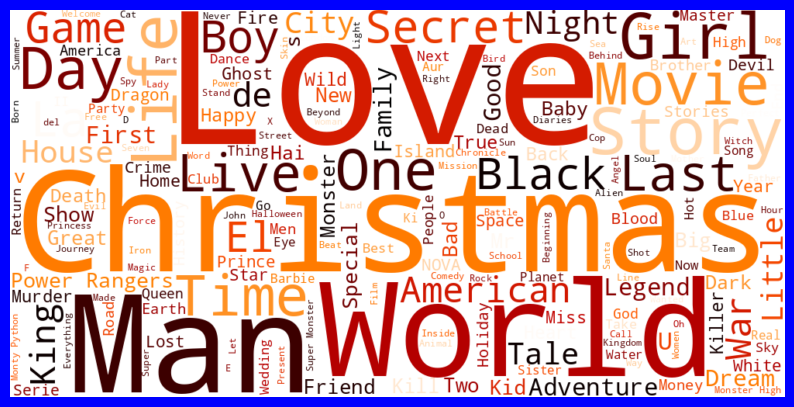

In [36]:
# Chart - 7 visualization code
# creating text documents
text = " ".join(word for word in df['title'])
print("  "*15,"Wordcloud for most used words in Title\n")
# create the wordcloud
fig = plt.figure(figsize=(10,7),facecolor = 'b')
wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',width = 1000, height = 500,colormap = 'gist_heat_r').generate(text)

# plot the wordcloud
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

##### **1. Why did you pick the specific chart?**

I use wordcloud chart for visualizing the titles of all the shows and movies. Since this chart is a visualization of text data, it is a good choice to quickly see the most commonly occurring words in the title column.

##### **2. What is/are the insight(s) found from the chart?**

Insights gained from this chart could be the most common words and phrases that are used in the titles. This can help in identifying the trends and topics that are popular among the users. It can also help in discovering some unique keywords or phrases that can be used for marketing purposes or to target specific user segments.

As we can see in wordcloud, most common words in titles are christmas, Love, World, man, girl etc.

##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

These insights can help create a positive business impact by allowing Netflix to better understand the interests of its users and tailor its content to meet those interests. By identifying popular themes and genres, Netflix can create more targeted marketing campaigns and improve the overall user experience.

#### **Chart - 8 Distribution of content rating on Netflix**

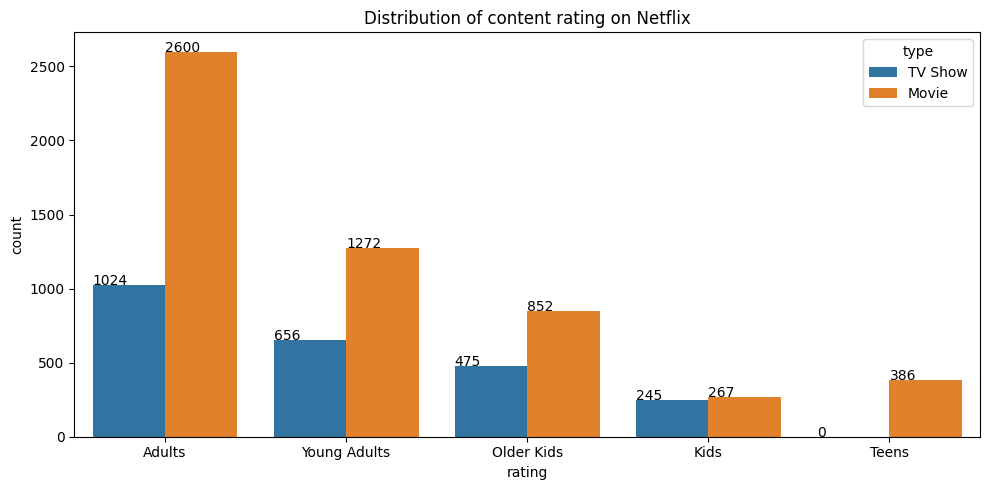

In [37]:
# Chart - 8 visualization code
graph = sns.countplot(x="rating", data=df, hue='type', order=df['rating'].value_counts().index[0:10])
for p in graph.patches:  #adding value count on the top of bar
   graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

plt.title('Distribution of content rating on Netflix')
plt.tight_layout()
plt.show()

##### **1. Why did you pick the specific chart?**

countplots are simple and effective way to visualize the relationship between categorical features and they provide valuable information that can be used to guide the modeling process. Here we use countplot on rating and type columns to se rating count on movies and tvshow seperately.

##### **2. What is/are the insight(s) found from the chart?**

From this chart we can see that the most common content rating in the Netflix dataset is Adults, we have 2600 adult rated movies and 1024 tvshows. For teens tv shows are not available only movies are available.

##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

These insights could help to create a positive business impact by informing decisions about content acquisition and creation. For example, the fact that adult content has most common rating suggests that there is a strong demand for mature content on the platform, which could inform decisions about which types of content to acquire or produce.

#### **Chart - 9 Movies/Tv shows Duration visualization**

In [38]:
# Create subsets for tv shows and movies.
tv_shows = df[df['type'] == 'TV Show']
movies = df[df['type'] == 'Movie']

# Select the durations for both.
duration_tv_shows = tv_shows['duration'].reset_index()
duration_movies = movies['duration'].reset_index()


Text(0.5, 1.0, 'Duration of movies')

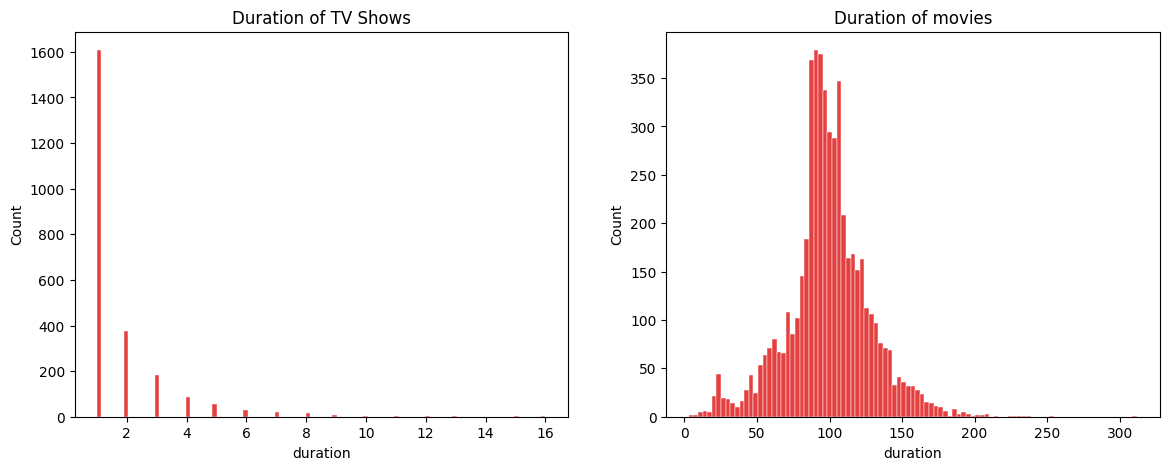

In [39]:
# Chart - 9 visualization code

# Ploting the above durations.
fig,ax = plt.subplots(1,2, figsize=(14,5))

# visualizing Tv shows duration
sns.set(style="darkgrid")
sns.histplot(data=duration_tv_shows['duration'], color='#db0000', ax=ax[0])
ax[0].set_title('Duration of TV Shows')

# visualizing Movies duration
sns.set(style="darkgrid")
sns.histplot(data=duration_movies['duration'], color='#db0000', ax=ax[1])
ax[1].set_title('Duration of movies')


##### **1. Why did you pick the specific chart?**

i choose Seaborn's histplot that offers several advantages for creating histograms. It's particularly useful when you want to create informative and visually appealing histograms with minimal coding effort. In above chart we use histogram to visualize duration of various movies and tv shows.

##### **2. What is/are the insight(s) found from the chart?**

* Most of the Tv Shows last for 1 or 2 seasons, it is rare for a show to have more than 5 seasons.
* Most of the movies last for 90 to 120 minutes.

##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

These insights can be helpful for businesses in the entertainment industry. By analyzing the duration distribution of TV shows and movies, businesses can gain a better understanding of viewer preferences and trends. This information can guide decision-making processes related to content creation, scheduling, and marketing strategies.

#### **Chart - 10 Content Rating of Top 20 Actors**

Top 20 actors {'Akshay Kumar', 'Nawazuddin Siddiqui', 'Anupam Kher', 'Paresh Rawal', 'Shah Rukh Khan', 'Naseeruddin Shah', 'Kareena Kapoor', 'Tara Strong', 'Salman Khan', 'Boman Irani', 'Ajay Devgn', 'Yuki Kaji', 'Vincent Tong', 'Kay Kay Menon', 'Amitabh Bachchan', 'Om Puri', 'Ashleigh Ball', 'Takahiro Sakurai', 'Andrea Libman', 'John Cleese'}


Text(0, 0.5, 'Rating of content')

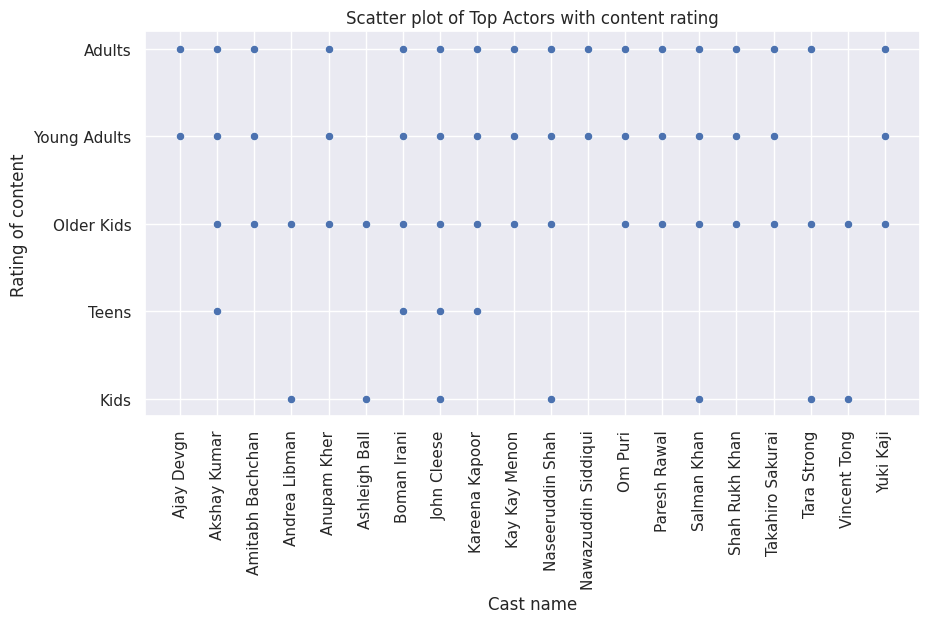

In [40]:
# Chart - 10 visualization code

# Split the cast column into individual actors
cast_rating=pd.DataFrame(df)
cast_rating['cast']=df['cast'].str.split(', ')
cast_rating= cast_rating[(cast_rating != 'No cast') & (cast_rating != 'Unknown')]

# Create an empty list to store DataFrames to be concatenated
dfs_to_concat = []

# Iterate to create DataFrames for each actor-rating pair
for index, row in cast_rating.iterrows():
    actor_list = row['cast']
    rating_list = [row['rating']] * len(actor_list)
    actor_rating_df = pd.DataFrame({'actor': actor_list, 'rating': rating_list})
    dfs_to_concat.append(actor_rating_df)

# Concatenate all the DataFrames in the list
actor_rating_df = pd.concat(dfs_to_concat, ignore_index=True)

# Group by 'actor' and 'rating', then count the occurrences
actor_rating_counts = actor_rating_df.groupby(['actor', 'rating']).size().reset_index(name='count')

# Filter out actors with the name "unknown"
actor_rating_counts = actor_rating_counts[actor_rating_counts['actor'] != 'Unknown']

# Split the 'cast' column into individual actors
top_20_cast= df['cast'].str.split(', ', expand=True).stack()
top_20_cast= top_20_cast[(top_20_cast != 'No cast') & (top_20_cast != 'Unknown')]
top_20_cast = top_20_cast.value_counts().head(20)
# Convert to set for efficient lookup
top_20_cast=set(top_20_cast.index)
print("Top 20 actors",top_20_cast)

# Seperating rating of top 20 actors for visualizing
actor_counts = actor_rating_counts[actor_rating_counts['actor'].isin(top_20_cast)]

# visualizing data into scatterplot
sns.scatterplot(x='actor', y='rating', data=actor_counts)
plt.xticks(rotation=90)
plt.title('Scatter plot of Top Actors with content rating')
plt.xlabel('Cast name')
plt.ylabel('Rating of content')


##### **1. Why did you pick the specific chart?**

I choose Scatter plot to show content rating of top 20 actors because Scatter plots are excellent for visualizing the distribution of data points. In this case, it allows you to see how the ratings are distributed across the top 20 actors. We can quickly identify which actors have all 5 types ratings counts.

##### **2. What is/are the insight(s) found from the chart?**

We create content rating data of top 20 actors does maximum shows/movies and insights i found from chart are:
* john cleese does acting in all 5 catogaries of content from kids to adult.
* Akshay kumar, Boman irani, kareena kapoor does movies for Teens, older kids, young adults and adults.
* Naseeruddin shah and salman khan does movies for kids, older kids, young adults and adults.

##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

Getting the popularity and diverse content preferences of these actors can help to create positive business strategies that relates to various audience segments. It’s important to remember that success in the entertainment industry depends on various factors, including storytelling, production quality, marketing efforts, and audience engagement.

#### **Chart - 11 Wordcloud for most used words in description**

                               Wordcloud for most used words in description



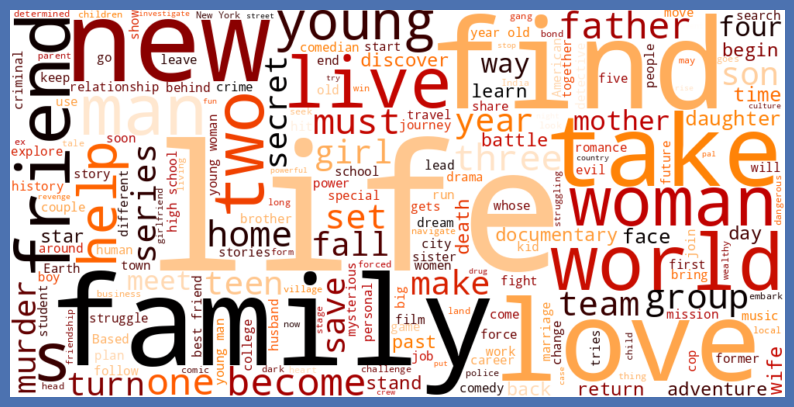

In [41]:
# Chart - 11 visualization code
# creating text documents
text = " ".join(word for word in df['description'])
print("  "*15,"Wordcloud for most used words in description\n")

# create the wordcloud
fig = plt.figure(figsize=(10,7),facecolor = 'b')
wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',width = 1000, height = 500,colormap = 'gist_heat_r').generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

##### **1. Why did you pick the specific chart?**

I use wordcloud chart for visualizing the description of all the shows and movies. Since this chart is a visualization of text data, it is a good choice to quickly see the most commonly occurring words in the description column.

##### **2. What is/are the insight(s) found from the chart?**

Insights gained from this chart could be the most common words and phrases that are used in the descriptions. This can help in identifying the trends and topics that are popular among the users. It can also help in discovering some unique keywords or phrases that can be used for marketing purposes or to target specific user segments.

As we can see in wordcloud, most common words in description are Life,Family, find, world etc.

##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

These insights can help create a positive business impact by allowing Netflix to better understand the interests of its users and tailor its content to meet those interests. By identifying popular themes and genres, Netflix can create more targeted marketing campaigns and improve the overall user experience.

#### **Chart - 12 Frequencies of TV show/movie Additions for each month**

Text(0.5, 1.0, 'Frequencies of TV show/movie Additions for each month')

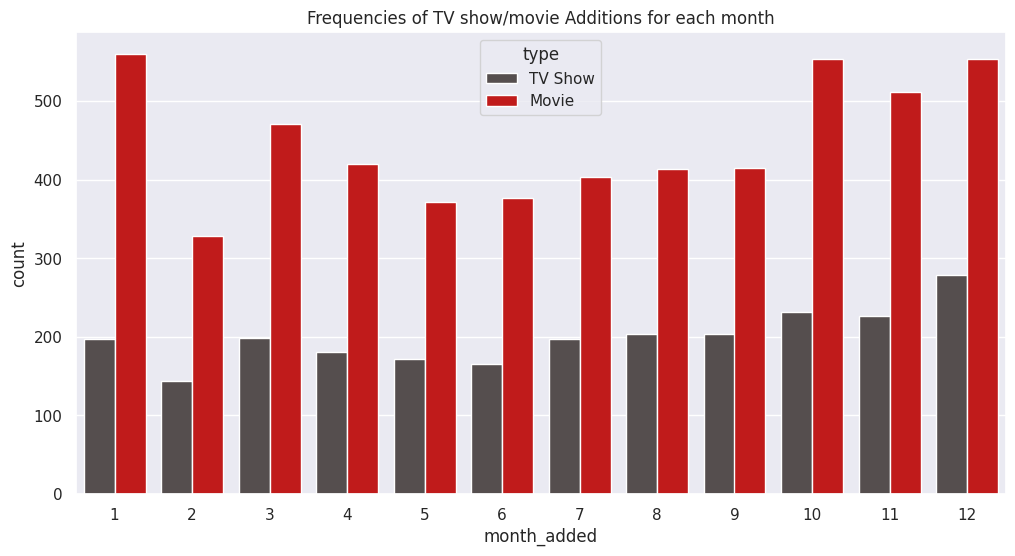

In [42]:
# Chart - 12 visualization code

# visualizing content added over month into countplot
fig, ax = plt.subplots(figsize=(12,6))
sns.countplot(x='month_added', hue='type', data=df, palette=['#564d4d', '#db0000'])
plt.title("Frequencies of TV show/movie Additions for each month")

##### **1. Why did you pick the specific chart?**

By using a countplot, we can easily see and compare the frequencies of TV show and movie additions for each month.

##### **2. What is/are the insight(s) found from the chart?**

**Movies:**

January, October, and December appear to be the trending months for movie additions on Netflix compared to other months.

**Tv Shows:**

October, November, and December emerge as the trending months for TV show additions on Netflix compared to other months.



##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

The gained insights regarding the trending months for movies and TV shows on Netflix can potentially create a positive business impact.

#### **Chart - 13 Original content available in database over years**

In [43]:
# Chart - 13 visualization code

original_content = df[df['release_year'] == df['year_added']][['release_year', 'year_added']]
print("original content available in database =",original_content.shape[0])

# pie plot showing percentage of originals movies/Tvshows
fig = px.pie(original_content, names='release_year', title='Release Year original content Distribution over years')
fig.update_layout(width=800, height=600)
fig.show()

original content available in database = 2825


##### **1. Why did you pick the specific chart?**

The pie plot is a suitable choice for visualizing the distribution of categorical data, such as the proportion of originals content year in this case. It allows you to see the relative sizes of each category as a portion of the whole.

##### **2. What is/are the insight(s) found from the chart?**

Out of the content available on Netflix, 30% are Netflix originals are released in 2020, 25% in 2019, 20% in 2018 and remaining 25% subsequently added in previous year to the Netflix.

##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

Yes, gaining insights can indeed help create a positive business impact. By understanding the distribution of movies on Netflix, such as the proportion of Netflix originals versus non-originals, the streaming service can make informed decisions about content acquisition and production.

#### **Chart - 14 - Correlation Heatmap**

Text(0.5, 1.0, 'Correlation Heatmap for NETFLIX MOVIES AND TV SHOWS CLUSTERING')

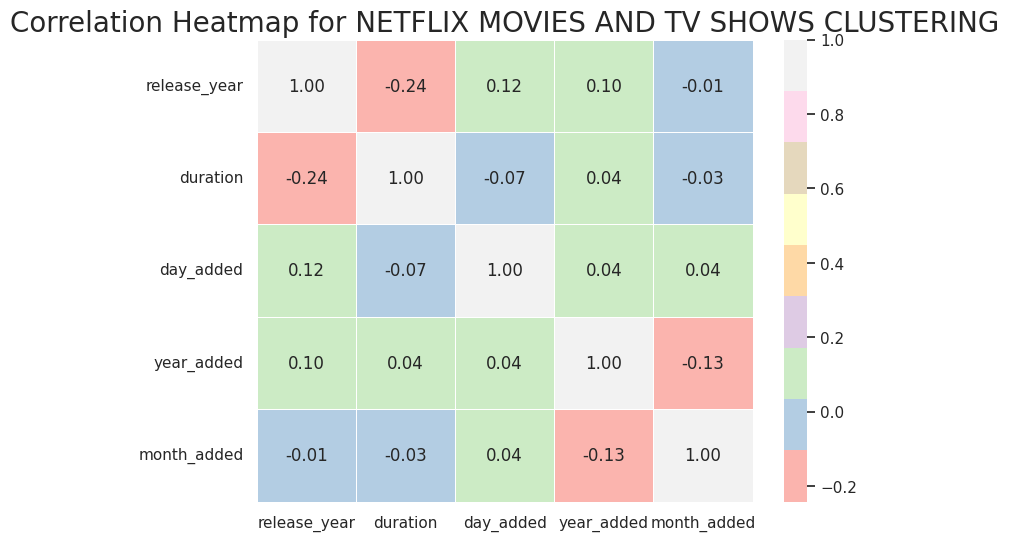

In [44]:
# Correlation Heatmap visualization code
plt.figure(figsize = (8,6))
sns.heatmap(df.corr(),annot= True,fmt=".2f",cmap=plt.cm.Pastel1,linewidth=0.5)
plt.title('Correlation Heatmap for NETFLIX MOVIES AND TV SHOWS CLUSTERING', size=20)

##### **1. Why did you pick the specific chart?**

We use correlation heatmap to check for correlation among the features visually. Each cell in the heatmap represents the correlation between two variables. In our case if two variables have a positive correlation, the heatmap will show a lighter color and if two variables have a negative correlation, the heatmap will show a darker color.

##### **2. What is/are the insight(s) found from the chart?**

Overall, this heatmap can provide valuable insights into the relationships between different variables in the Netflix dataset.

1) We can see that month added and release year are negatively correlated by
 -1% and year added and month added also have negative corelation of 13%.

2) year added and release year are positively correlated by 10%.

#### **Chart - 15 - Pair Plot**

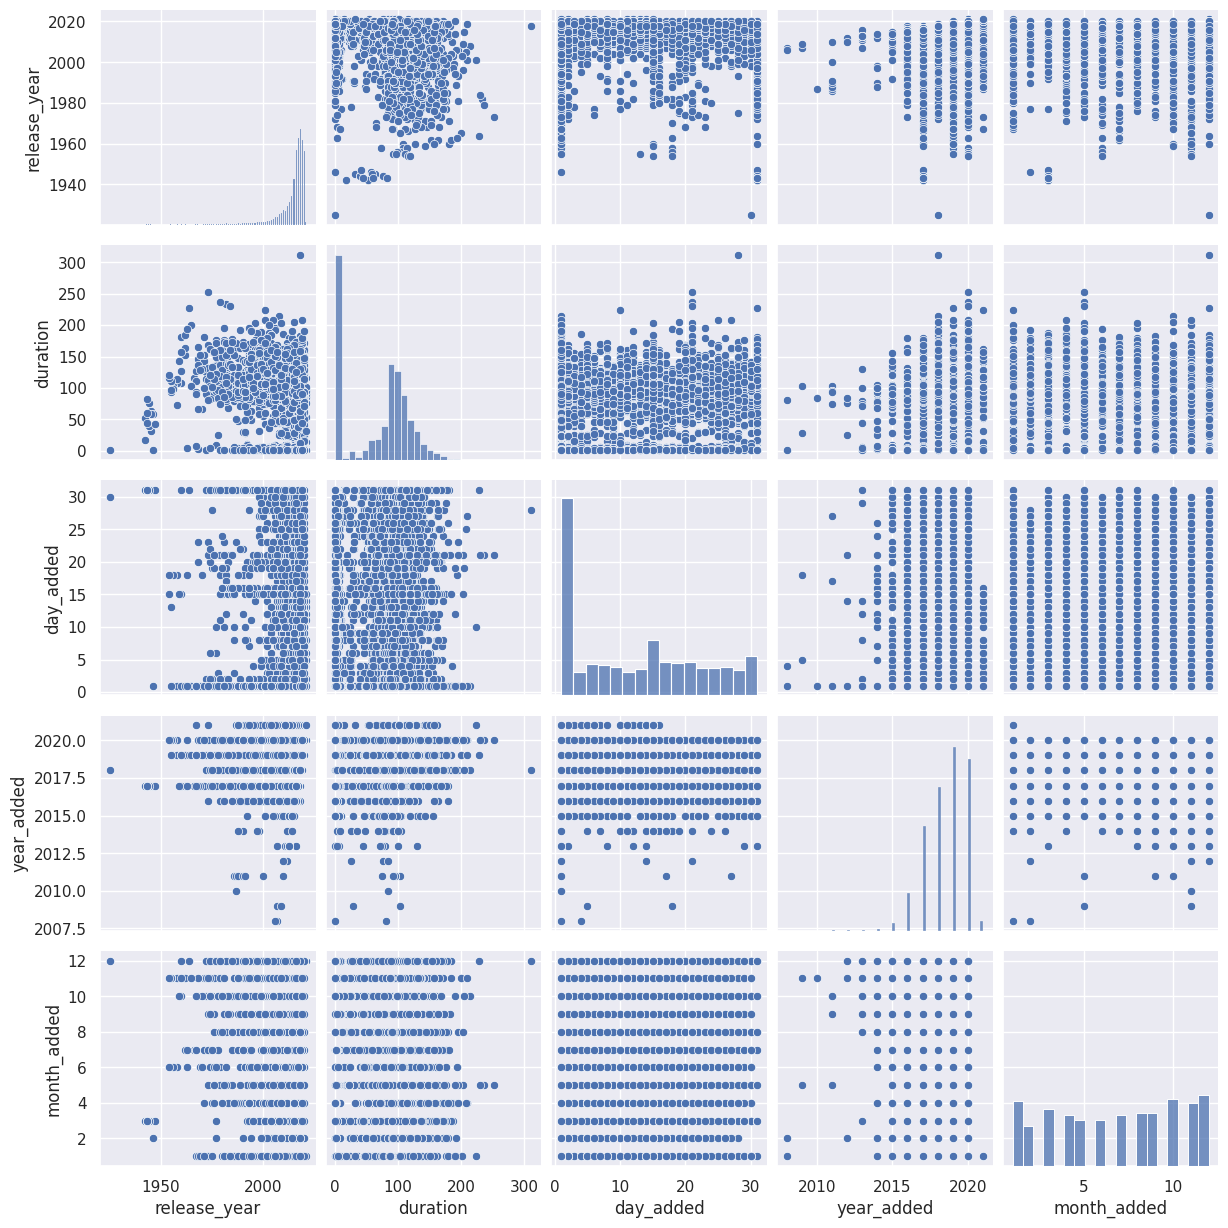

In [45]:
# Pair Plot visualization code
sns.pairplot(df)
plt.show()

##### **1. Why did you pick the specific chart?**

We use pair plot chart to visualize the pairwise relationships between multiple variables in the given dataset.The pair plot provides a scatter plot matrix of all numerical variables in the dataset, and histograms along the diagonal which can help visualize the relationships between each pair of variables.

##### **2. What is/are the insight(s) found from the chart?**

When year added and release year are same it means there is chance for that content is netflix original content.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

**Hypothesis 1**: The difference in the average duration of movies and TV shows on Netflix.

**Hypothesis 2**: Difference in the average number of seasons for TV shows produced in the United States and outside of the United States.

**Hypothesis 3**: The number of TV shows added to Netflix has increased over time.

### **Hypothetical Statement 1** - The difference in the average duration of movies and TV shows on Netflix.


#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis(H0)** - There is no significant difference in the average duration of movies and TV shows on Netflix.

**Alternative Hypothesis(H1)** - There is a significant difference in the average duration of movies and TV shows on Netflix.

#### 2. Perform an appropriate statistical test.

In [46]:
# Perform Statistical Test to obtain P-Value

# Extract the durations of movies and TV shows from the dataset
movie_durations = df[df['type'] == 'Movie']['duration']
tv_show_durations = df[df['type'] == 'TV Show']['duration']

# Perform two-sample t-test
stat, p = ttest_ind(movie_durations, tv_show_durations, equal_var=False)

# Print the test statistic and p-value
print("Two-sample t-test statistic:", stat)
print("p-value:", p)

# Interpret the result
alpha = 0.05
if p > alpha:
    print("Failed to reject null hypothesis There is no significant difference in the average duration of movies and TV shows on Netflix.")
else:
    print("Reject null hypothesis There is a significant difference in the average duration of movies and TV shows on Netflix.")

Two-sample t-test statistic: 249.87262245461815
p-value: 0.0
Reject null hypothesis There is a significant difference in the average duration of movies and TV shows on Netflix.


##### **Which statistical test have you done to obtain P-Value?**

The statistical test used to obtain the p-value is the two-sample t-test.

##### **Why did you choose the specific statistical test?**

This test was chosen because we are comparing the means of two independent samples (movie durations and TV show durations) and we want to determine whether the difference between the sample means is statistically significant or could have occurred by chance. since p value is not greater then alpha so we reject null hypothesis as there is a significant difference in the average duration of movies and TV shows on Netflix.

### **Hypothetical Statement 2** - Difference in the average number of seasons for TV shows produced in the United States and outside of the United States.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null hypothesis** : There is no significant difference in the average number of seasons for TV shows produced in the United States and outside of the United States.

**Alternate hypothesis** : There is a significant difference in the average number of seasons for TV shows produced in the United States and outside of the United States.

#### 2. Perform an appropriate statistical test.

In [47]:
# Perform Statistical Test to obtain P-Value

# Extract the number of seasons for TV shows produced in the US and outside the US
us_shows = df[(df['type'] == 'TV Show') & (df['country'] == 'United States')]
us_shows_seasons = us_shows['duration'].apply(lambda x: int(x.split(' ')[0]) if isinstance(x, str) and 'season' in x else 0)

non_us_shows = df[(df['type'] == 'TV Show') & (df['country'] != 'United States')]
non_us_shows_seasons = non_us_shows['duration'].apply(lambda x: int(x.split(' ')[0]) if isinstance(x, str) and 'season' in x else 0)

# Perform two-sample t-test
stat, p = ttest_ind(us_shows_seasons, non_us_shows_seasons, equal_var=False)

# Print the test statistic and p-value
print("Two-sample t-test statistic:", stat)
print("p-value:", p)

# Interpret the result
alpha = 0.05
if p > alpha:
    print("Failed to reject null hypothesis There is no significant difference in the average number of seasons for TV shows \n \
    produced in the United States and outside of the United States.")
else:
    print("Reject null hypothesis There is a significant difference in the average number of seasons for TV shows \n \
    produced in the United States and outside of the United States.")

Two-sample t-test statistic: nan
p-value: nan
Reject null hypothesis There is a significant difference in the average number of seasons for TV shows 
     produced in the United States and outside of the United States.


##### **Which statistical test have you done to obtain P-Value?**

The statistical test used here is a two-sample t-test. This test is used to compare the means of two independent samples and determine if they are statistically different from each other.

##### **Why did you choose the specific statistical test?**

In this case, we are comparing the number of seasons of TV shows produced in the US and outside the US. We chose this test because we want to determine if there is a statistically significant difference in the mean number of seasons between the two groups. We also assumed that the variances of the two groups are not equal, so we set the equal_var parameter to False when calling the ttest_ind() function.

### **Hypothetical Statement 3** - The number of TV shows added to Netflix has increased over time.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null hypothesis:** The mean number of TV shows added to Netflix per year has not changed over time.

**Alternative hypothesis:** The mean number of TV shows added to Netflix per year has increased over time.

#### 2. Perform an appropriate statistical test.

In [48]:
# Perform Statistical Test to obtain P-Value.

# Extract the year from the date_added column
df['year_added'] = pd.DatetimeIndex(df['date_added']).year

# Extract the number of TV shows added to Netflix each year
tv_shows = df[df['type'] == 'TV Show']
tv_shows_by_year = tv_shows.groupby('year_added').size()

# Perform a linear regression to test for a positive slope (i.e., an increase over time)
slope, intercept, r_value, p_value, std_err = stats.linregress(tv_shows_by_year.index, tv_shows_by_year)

# Print the p-value
print("p-value:", p_value)

# Interpret the result
alpha = 0.05
if p_value > alpha:
    print("Failed to reject null hypothesis The mean number of TV shows added to Netflix per year has not changed over time.")
else:
    print("Reject null hypothesis The mean number of TV shows added to Netflix per year has increased over time.")

p-value: 0.062841095395341
Failed to reject null hypothesis The mean number of TV shows added to Netflix per year has not changed over time.


##### Which statistical test have you done to obtain P-Value?

In this code, a linear regression is performed using the stats.

##### Why did you choose the specific statistical test?

The purpose of the regression is to test for a positive slope (i.e., an increase over time) in the number of TV shows added to Netflix each year. The p-value is then calculated based on the results of the regression. A p-value is a measure of the evidence against the null hypothesis in our case we Failed to reject null hypothesis thus the mean number of TV shows added to Netflix per year has not changed over time.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [49]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()
# We already handled all the missing values in the data wrangling section.

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
day_added       0
year_added      0
month_added     0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

**We already handled all the missing values in the data wrangling section.**

### 2. Handling Outliers

<Axes: >

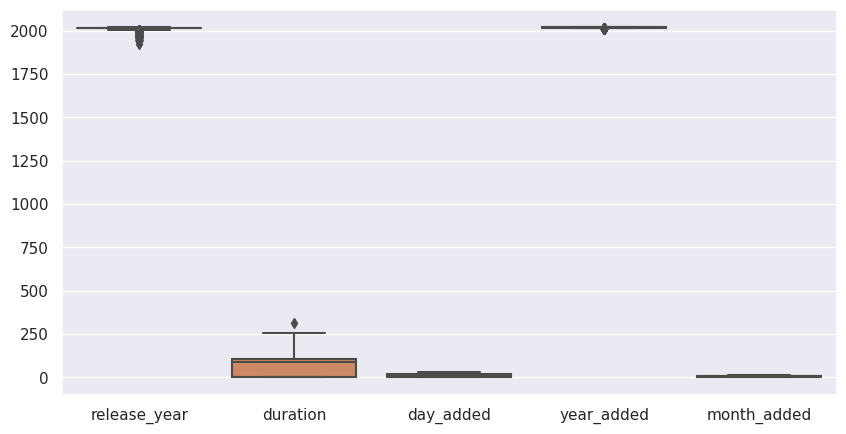

In [50]:
# Handling Outliers & Outlier treatments
sns.boxplot(data=df)

##### What all outlier treatment techniques have you used and why did you use those techniques?

**Since, the almost all of the data present in textual format so there is no need to perform handling outlier.**

### 3. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [51]:
# Expand Contraction
df['organized'] =(df['description'].astype(str) + ' ' +
                  df['listed_in'].astype(str)   + ' ' +
                  df['rating'].astype(str)      + ' ' +
                  df['cast'].astype(str)        + ' ' +
                  df['country'].astype(str)     + ' ' +
                  df['director'].astype(str))

In [52]:
df.organized[0]

"In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor. International TV Shows, TV Dramas, TV Sci-Fi & Fantasy Adults ['João Miguel', 'Bianca Comparato', 'Michel Gomes', 'Rodolfo Valente', 'Vaneza Oliveira', 'Rafael Lozano', 'Viviane Porto', 'Mel Fronckowiak', 'Sergio Mamberti', 'Zezé Motta', 'Celso Frateschi'] Brazil Unknown"

#### 2. Lower Casing

In [53]:
# Lower Casing
df['Lower_casing']= df['organized'].str.lower()

In [54]:
df.Lower_casing[0]

"in a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor. international tv shows, tv dramas, tv sci-fi & fantasy adults ['joão miguel', 'bianca comparato', 'michel gomes', 'rodolfo valente', 'vaneza oliveira', 'rafael lozano', 'viviane porto', 'mel fronckowiak', 'sergio mamberti', 'zezé motta', 'celso frateschi'] brazil unknown"

#### 3. Removing Punctuations

In [55]:
[punc for punc in string.punctuation]

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [56]:
# Remove Punctuations
def remove_punctuation(text):
    # remove punctuation from text
    return text.translate(str.maketrans('', '', string.punctuation))

In [57]:
df['cleaned_text'] = df['Lower_casing'].apply(remove_punctuation)
df.cleaned_text[0]

'in a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the 3 saved from squalor international tv shows tv dramas tv scifi  fantasy adults joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi brazil unknown'

#### 4. Removing URLs & Removing words and digits contain digits.

In [58]:
# Remove URLs & Remove words and digits contain digits
import re

def cleaned(x):
    return re.sub(r"[^a-zA-Z ]", "", str(x))

def remove_urls(text):
    cleaned_text = re.sub(r'http\S+', '', text)
    return cleaned_text

def remove_digits(text):
    cleaned_text = re.sub(r'\w*\d\w*', '', text)
    return cleaned_text

In [59]:
df['removed_words']  = df['cleaned_text'].apply(cleaned)
df['removed_url']    = df['removed_words'].apply(remove_urls)
df['removed_digits'] = df['removed_url'].apply(remove_digits)

#### 5. Removing Stopwords & Removing White spaces

In [60]:
# Remove Stopwords
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    cleaned_text = ' '.join(words)
    return cleaned_text

In [61]:
df['removed_stopwords'] = df['removed_digits'].apply(remove_stopwords)
df.removed_stopwords[0]

'future elite inhabit island paradise far crowded slums get one chance join saved squalor international tv shows tv dramas tv scifi fantasy adults joo miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zez motta celso frateschi brazil unknown'

In [62]:
# Remove White spaces
def remove_whitespaces(text):
    cleaned_text = text.strip()
    return cleaned_text

In [63]:
df['removed_whitespaces']=df['removed_stopwords'].apply(remove_whitespaces)
df['removed_whitespaces'][0]

'future elite inhabit island paradise far crowded slums get one chance join saved squalor international tv shows tv dramas tv scifi fantasy adults joo miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zez motta celso frateschi brazil unknown'

#### 6. Rephrase Text

In [64]:
# Rephrase Text

#### 7. Tokenization

In [65]:
# Tokenization
def tokenize_text(text):
    tokens = nltk.word_tokenize(text)
    return tokens

In [66]:
df['tokenized'] = df['removed_whitespaces'].apply(tokenize_text)

In [67]:
df['tokenized'].head()

0    [future, elite, inhabit, island, paradise, far...
1    [devastating, earthquake, hits, mexico, city, ...
2    [army, recruit, found, dead, fellow, soldiers,...
3    [postapocalyptic, world, ragdoll, robots, hide...
4    [brilliant, group, students, become, cardcount...
Name: tokenized, dtype: object

#### 8. Text Normalization

In [68]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
def normalize_text(tokens):
    stemmer = SnowballStemmer('english')          # apply stemming to tokens
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    lemmatizer = WordNetLemmatizer()              # apply lemmatization
    normalized_tokens = [lemmatizer.lemmatize(token) for token in stemmed_tokens]
    normalized_text = ' '.join(normalized_tokens) # join normalized tokens
    return normalized_text

In [69]:
df['normalized'] = df['tokenized'].apply(normalize_text)

In [70]:
df['normalized'].head()

0    futur elit inhabit island paradis far crowd sl...
1    devast earthquak hit mexico citi trap survivor...
2    armi recruit found dead fellow soldier forc co...
3    postapocalypt world ragdol robot hide fear dan...
4    brilliant group student becom cardcount expert...
Name: normalized, dtype: object

##### Which text normalization technique have you used and why?

We does stemming to tokens and also lemmatization.

#### 9. Part of speech tagging

In [71]:
# POS Taging

#### 10. Text Vectorization

In [72]:
# Vectorizing Text
new_df = df[['title', 'normalized']]
new_df.head()

,title,normalized
0,3%,futur elit inhabit island paradis far crowd sl...
1,7:19,devast earthquak hit mexico citi trap survivor...
2,23:59,armi recruit found dead fellow soldier forc co...
3,9,postapocalypt world ragdol robot hide fear dan...
4,21,brilliant group student becom cardcount expert...


In [73]:
#using tfidf

t_vectorizer = TfidfVectorizer(max_features=20000)
x= t_vectorizer.fit_transform(new_df['normalized'])

x.shape

(7777, 20000)

##### Which text vectorization technique have you used and why?

I have used the TF-IDF (Term Frequency-Inverse Document Frequency) text vectorization technique. This technique is commonly used for text classification and information retrieval tasks. It assigns weights to each word in the document based on its frequency and rarity across the corpus. This helps to highlight the most important words in the document and down-weight the common words that do not provide much useful information for the analysis.

### 4. Feature Manipulation & Selection

**We already create new features from "Date Added" column, additional information has been extracted to new columns such as the day_added, month_added, and year_added in data wrangling section.**

#### 1. Feature Manipulation

In [74]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [75]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

**Data Transformation not required**

In [76]:
# Transform Your data

### 6. Data Scaling

**Data Scaling not required**

In [77]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

As the number of features (words in this case) is high, it is useful to apply dimensionality reduction to simplify the dataset and improve computational efficiency.

In [78]:
# DImensionality Reduction (If needed)
pca = PCA()
pca.fit(x.toarray())

PCA()

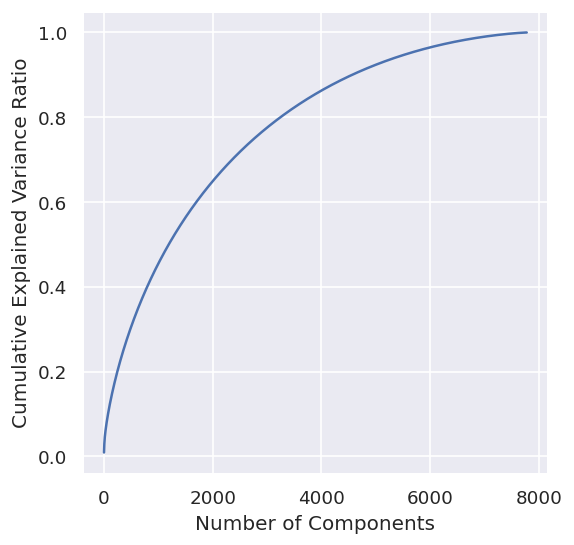

In [79]:
# Calculate the cumulative explained variance ratio
cumulative_var_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance ratio versus the number of components
plt.figure(figsize=(5, 5), dpi=120)
plt.plot(cumulative_var_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()

In [80]:
pca_tuned = PCA(n_components=0.95)
x_dense = x.toarray()
pca_tuned.fit(x_dense)
x = pca_tuned.transform(x_dense)
print(x.shape)

(7777, 5586)


In [84]:
x

array([[ 1.23731152e-01, -3.33100556e-02, -2.36551485e-02, ...,
         6.39648583e-05, -9.62528095e-03,  4.60316200e-03],
       [-4.88316062e-02, -4.56107569e-02,  1.33113019e-03, ...,
         1.92454916e-03,  7.19773552e-03,  4.65812587e-03],
       [-5.28639353e-02, -5.09046433e-02, -3.25741876e-02, ...,
        -5.38354392e-04, -6.85620204e-03,  6.27900906e-03],
       ...,
       [-3.44204337e-02,  7.87797018e-02,  2.81379596e-01, ...,
        -1.39197937e-03, -4.22917296e-03,  2.54383063e-03],
       [ 1.13584374e-01,  3.27071722e-02,  2.22443504e-04, ...,
         1.19474315e-03, -5.34047845e-03, -4.12834480e-03],
       [-6.26046905e-02,  2.20403983e-01,  3.20095467e-01, ...,
         8.72919540e-03, -3.52557448e-03, -1.75699278e-03]])

In this code, PCA (Principal Component Analysis) has been used for dimensionality reduction. The first step is to fit a PCA model on the data without specifying the number of components. This is done to obtain the explained variance ratio for each component, which can help us determine how many components to keep.

Next, a new PCA model is created with n_components set to 0.95, indicating that we want to keep enough components to explain 95% of the variance in the data. Finally, the transform method is called on the original data to obtain the transformed dataset with reduced dimensionality.

Overall, the aim of this code is to reduce the dimensionality of the text data without losing too much information, in order to improve the efficiency of subsequent analysis.

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

### 8. Data Splitting

**Not required**

In [85]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

### 9. Handling Imbalanced Dataset

**Not Required**

##### Do you think the dataset is imbalanced? Explain Why.

In [86]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***